Upload the CSV File

In [1]:
from google.colab import files
uploaded = files.upload()


Saving lemmatized_transcriptions_nostopwords.csv to lemmatized_transcriptions_nostopwords.csv


In [2]:
import pandas as pd

df_original = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

df_cleaned = df_original.copy()

df_original.head()


,Episode Number,Chunk Number,Duration (seconds),Transcription,transcription,Unnamed: 5,Segmented_Transcription,Split_Sentences,Lemmatized_Transcription,Lemmatized_Transcription_Normal
0,1,1,30.0,e kitshedimosetso ya kowid nauitlisediwake mot...,1. e\n2. kitshedimosetso ya kowid nauitlisediw...,1. Yes\n2. the introduction of kowid nauitlise...,e kits h e dim o setso ya ko w id na u...,"['e', 'kits h e dim o setso ya ko w id n...","['e', 'kits h a dim o setso ya ko w d a u l li...","['e', 'kits h a dim o setso ko w d a u l lis a..."
1,1,2,30.0,aba buakganya gore go na le ka mogokakgonango ...,1. aba buakganya gore go na le ka mogokakgonan...,1. He explained that there is a conflict betwe...,aba bua kganya gore go na le ka ...,['aba bua kganya gore go na le ka ...,['aba bua kga gora go a la go kgona o b w on...,"['aba bua kga gora a o b w ona t a ', 'gora tl..."
2,1,3,30.0,lts go bontlha gore baleban ba birisa tekhnolo...,1. lts go bontlha gore baleban ba birisa tekhn...,1. Let's show that the opponents are using tec...,l ts go bontlha gore bale ba n ba ...,['l ts go bontlha gore bale ba n ba ...,['l ts go bontlha gora ba ba ba biri sa t a k...,"['l ts bontlha gora biri t a k h o lo j a go',..."
3,1,4,30.0,kesar kowed nfatafika e ukwelelang mo e mokhwa...,1. kesar kowed nfa\n2. tafika e ukwelelang mo ...,1. kesar kowed nfa\n2. the army that is involv...,ke sa r ko we d n fata fika e uk welel...,"['ke', 'sa r ko we d n fata fika e uk ...","['ke', 'sa r ko wa d fata fi a uk wa a k h ...","['ke', 'sa r ko d fata fi a uk a k h o m', 'mo..."
4,1,5,30.0,kint ifitafita ya megotlhelo ipanayan oitanape...,1. kint ifitafita ya megotlhelo ipanayan oitan...,1. kint ifitatifata of mogolhelo ipanayan oita...,k in t i fi ta fi ta ya me gotlhe lo i...,['k in t i fi ta fi ta ya me gotlhe lo ...,['k t fi ta fi ta ya ma gotlha lo b a ya o ...,['k t fi ta fi ta ma gotlha lo b a o l a p a b...


Basic LDA on Tswana Transcripts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



 Top Words per Topic:
🔸 Topic 1: 0.038*"ga" + 0.027*"mo" + 0.025*"wa" + 0.022*"bona" + 0.019*"ento" + 0.017*"ne" + 0.016*"re" + 0.015*"na" + 0.013*"fa" + 0.012*"mme"
🔸 Topic 2: 0.045*"mo" + 0.025*"ga" + 0.023*"re" + 0.020*"ne" + 0.018*"na" + 0.016*"di" + 0.016*"bona" + 0.014*"ko" + 0.014*"mme" + 0.010*"wa"
🔸 Topic 3: 0.048*"re" + 0.032*"ga" + 0.024*"mo" + 0.019*"wa" + 0.017*"bona" + 0.016*"ko" + 0.016*"bana" + 0.014*"mme" + 0.013*"di" + 0.013*"ee"
🔸 Topic 4: 0.031*"ga" + 0.027*"na" + 0.020*"mme" + 0.017*"batho" + 0.016*"ne" + 0.015*"bona" + 0.014*"mo" + 0.014*"nne" + 0.013*"re" + 0.013*"bana"
🔸 Topic 5: 0.026*"mo" + 0.023*"bona" + 0.021*"di" + 0.020*"mme" + 0.019*"re" + 0.018*"batho" + 0.016*"ga" + 0.015*"ento" + 0.013*"na" + 0.012*"wa"


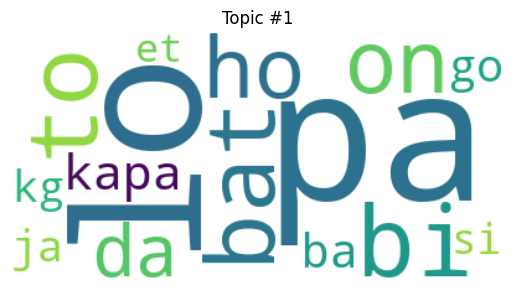

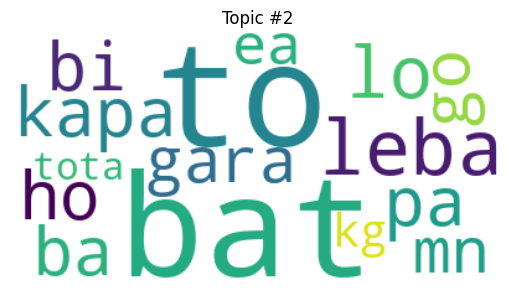

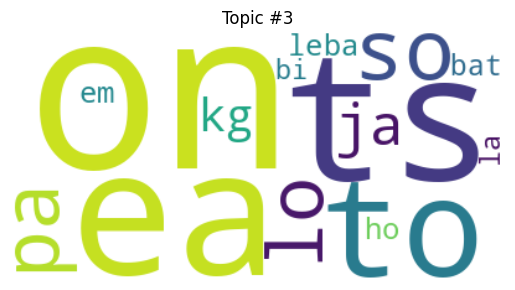

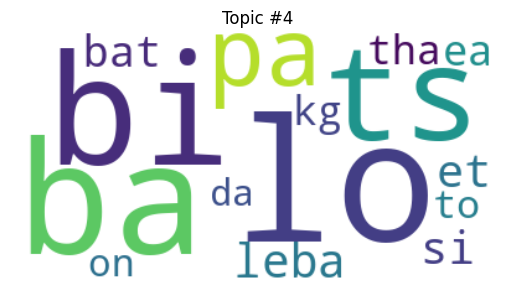

LDABasicCoherence (c_v):     0.2934
LDABasicCoherence (UMass):  -1.9378
LDABasicCoherence (NPMI):   -0.0341
LDABasicPerplexity:     -6.8823


In [7]:
# !pip install -U gensim nltk

import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords

# Load CSV
df = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

def clean_text(text):
    if pd.isnull(text): return []
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    return word_tokenize(text)  # keep stopwords and short words

df['tokens_tswana'] = df['Transcription'].apply(clean_text)

#  Dictionary & corpus
dictionary = corpora.Dictionary(df['tokens_tswana'])
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in df['tokens_tswana']]

#  Train LDA
lda_modelTB = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=20, random_state=42)

#  Print Topics
print("\n Top Words per Topic:")
for idx, topic in lda_modelTB.print_topics(num_words=10):
    print(f"🔸 Topic {idx+1}: {topic}")

# WordClouds
for i in range(ldaTI.num_topics):
    words = ldaTI.show_topic(i, topn=15)
    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(dict(words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{i+1}")
    plt.show()

# c_v Coherence (you already did this correctly)
coherence_cv = CoherenceModel(
    model=lda_modelTB, texts=df['tokens_tswana'], dictionary=dictionary, coherence='c_v'
).get_coherence()

# UMass Coherence
coherence_umass = CoherenceModel(
    model=lda_modelTB, corpus=corpus, dictionary=dictionary, coherence='u_mass'
).get_coherence()

# NPMI Coherence
coherence_npmi = CoherenceModel(
    model=lda_modelTB, texts=df['tokens_tswana'], dictionary=dictionary, coherence='c_npmi'
).get_coherence()

# Print all Results
print(f"LDABasicCoherence (c_v):     {coherence_cv:.4f}")
print(f"LDABasicCoherence (UMass):  {coherence_umass:.4f}")
print(f"LDABasicCoherence (NPMI):   {coherence_npmi:.4f}")
print(f"LDABasicPerplexity:     {lda_modelTB.log_perplexity(corpus):.4f}")


LDA Improvement


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



 Top Words per Topic:
🔸 Topic 1: 0.024*"pa" + 0.022*"lo" + 0.021*"bi" + 0.021*"to" + 0.019*"bat" + 0.017*"on" + 0.016*"ho" + 0.015*"da" + 0.015*"kapa" + 0.013*"ba"
🔸 Topic 2: 0.026*"to" + 0.025*"bat" + 0.022*"leba" + 0.019*"lo" + 0.017*"kapa" + 0.017*"pa" + 0.017*"ho" + 0.017*"ba" + 0.016*"bi" + 0.016*"go"
🔸 Topic 3: 0.029*"on" + 0.018*"ts" + 0.017*"ea" + 0.017*"to" + 0.016*"so" + 0.014*"pa" + 0.013*"lo" + 0.012*"ja" + 0.012*"kg" + 0.011*"leba"
🔸 Topic 4: 0.028*"lo" + 0.023*"ba" + 0.023*"bi" + 0.016*"ts" + 0.016*"pa" + 0.016*"leba" + 0.015*"si" + 0.015*"et" + 0.013*"bat" + 0.012*"ea"


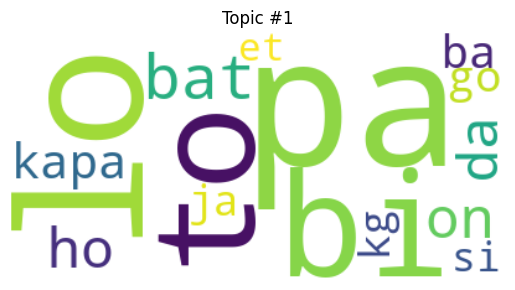

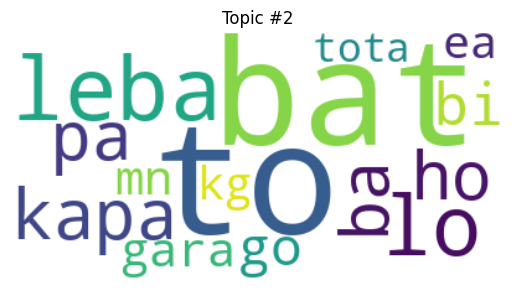

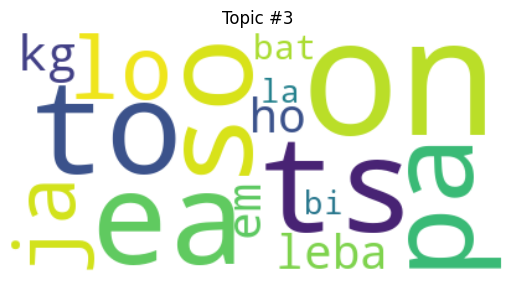

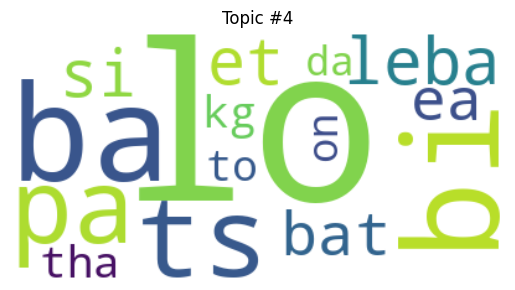


 LDACoherence (c_v): 0.2777
 LDACoherence (UMass): -1.3313
 LDACoherence (NPMI):  -0.0200
 LDAPerplexity (log):  -6.0370 


In [6]:
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud

nltk.download('punkt')

# Load CSV
df = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

# Clean text
def clean_text(text):
    if pd.isnull(text): return ''
    return text.lower().translate(str.maketrans('', '', string.punctuation))

df['cleaned_tswana'] = df['Lemmatized_Transcription_Normal'].apply(clean_text)

# Tokenize
df['tokens'] = df['cleaned_tswana'].apply(word_tokenize)

# TF-IDF Preprocessing
tfidf = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf_matrix = tfidf.fit_transform(df['cleaned_tswana'])
tfidf_features = set(tfidf.get_feature_names_out())

# Filter tokens
df['tokens_filtered'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word in tfidf_features])

# Gensim Dictionary & Corpus
dictionary = Dictionary(df['tokens_filtered'])
dictionary.filter_extremes(no_below=2, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in df['tokens_filtered']]

# LDA Model
ldaTI = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=4,
    passes=20,
    iterations=400,
    alpha='auto',
    eta='auto',
    random_state=1
)

# Print Topics
print("\n Top Words per Topic:")
for idx, topic in ldaTI.print_topics(num_words=10):
    print(f"🔸 Topic {idx + 1}: {topic}")

# WordClouds
for i in range(ldaTI.num_topics):
    words = ldaTI.show_topic(i, topn=15)
    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(dict(words))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{i+1}")
    plt.show()

# Evaluation
coherence_model = CoherenceModel(model=ldaTI, texts=df['tokens_filtered'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

perplexity_score = ldaTI.log_perplexity(corpus)


# UMass Coherence
coherence_umass = CoherenceModel(
    model=ldaTI,
    corpus=corpus,
    dictionary=dictionary,
    coherence='u_mass'
).get_coherence()

# NPMI Coherence (c_npmi)
coherence_npmi = CoherenceModel(
    model=ldaTI,
    texts=df['tokens_filtered'],
    dictionary=dictionary,
    coherence='c_npmi'
).get_coherence()

# Perplexity
perplexity_score = ldaTI.log_perplexity(corpus)

# Print all Results

print(f"\n LDACoherence (c_v): {coherence_score:.4f}")
print(f" LDACoherence (UMass): {coherence_umass:.4f}")
print(f" LDACoherence (NPMI):  {coherence_npmi:.4f}")
print(f" LDAPerplexity (log):  {perplexity_score:.4f} ")



Basic Twana NMF Modeling

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



 Basic NMF Topics:
Topic 1: go ya ga na nne mo enta tsa batho fa
Topic 2: ba batho bana gore ke bona bone mo ne le
Topic 3: gore ka ke re ga mme bona ya mo wa
Topic 4: le ka mo ke na re di ne wa ya


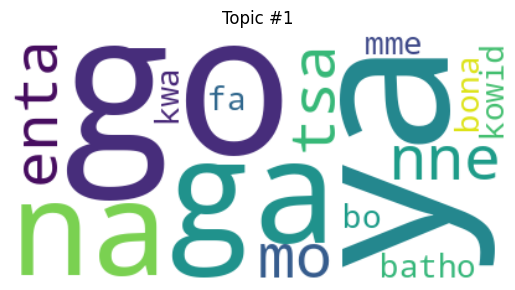

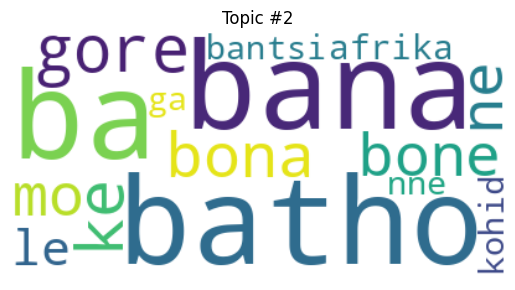

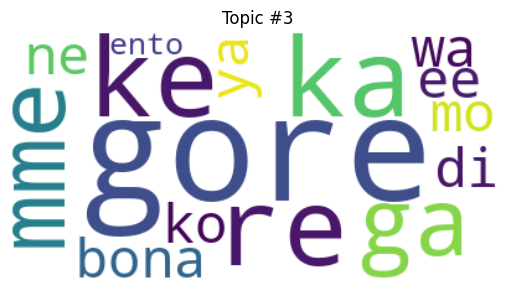

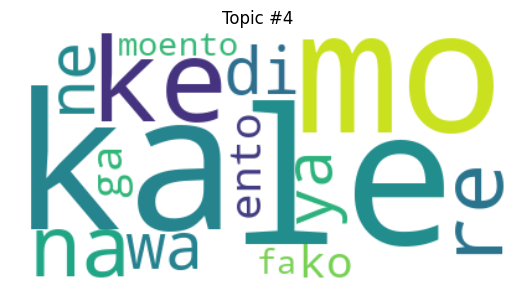


 NMF Coherence (c_v):    0.4007
 NMF Coherence (UMass): -1.1289
 NMF Coherence (NPMI):  -0.0176
  NMF Reconstruction Error: 210.8963


In [10]:
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')

# --- Load and clean text ---
df = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

def clean_text(text):
    if pd.isnull(text): return ''
    return text.lower().translate(str.maketrans('', '', string.punctuation))

df['cleaned'] = df['Transcription'].apply(clean_text)

# --- Tokenize for coherence ---
df['tokens'] = df['cleaned'].apply(word_tokenize)

# --- CountVectorizer (bare-min input) ---
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
feature_names = vectorizer.get_feature_names_out()

# --- NMF Training ---
nmf = NMF(n_components=4, random_state=42)
nmf.fit(X)

# --- Extract top words per topic ---
topics = []
for topic in nmf.components_:
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics.append(top_words)

# --- Gensim dictionary & corpus for coherence ---
dictionary = Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(t) for t in df['tokens']]

# --- Coherence evaluation ---
coherence_cv = CoherenceModel(topics=topics, texts=df['tokens'], dictionary=dictionary, coherence='c_v').get_coherence()
coherence_umass = CoherenceModel(topics=topics, texts=df['tokens'], dictionary=dictionary, coherence='u_mass').get_coherence()
coherence_npmi = CoherenceModel(topics=topics, texts=df['tokens'], dictionary=dictionary, coherence='c_npmi').get_coherence()

#Print all results
print("\n Basic NMF Topics:")
for idx, words in enumerate(topics):
    print(f"Topic {idx+1}: {' '.join(words)}")

#  WordClouds
for i, topic in enumerate(nmf.components_):
    wc = WordCloud(background_color='white').generate(' '.join([feature_names[j] for j in topic.argsort()[:-15 - 1:-1]]))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{i+1}")
    plt.show()

print(f"\n NMF Coherence (c_v):    {coherence_cv:.4f}")
print(f" NMF Coherence (UMass): {coherence_umass:.4f}")
print(f" NMF Coherence (NPMI):  {coherence_npmi:.4f}")
print(f"  NMF Reconstruction Error: {nmf.reconstruction_err_:.4f}")


TF-IDF + NMF (Improved) on Tswana Transcripts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(



 Top Words per Topic:
🔸 Topic 1: re ha le ka ne di pa gore in ra
🔸 Topic 2: ba bat bana gore batho le ng ke bone ha
🔸 Topic 3: ke ya on so ko wa mo nka re di
🔸 Topic 4: go gore ga le ka mo bo ya na mme


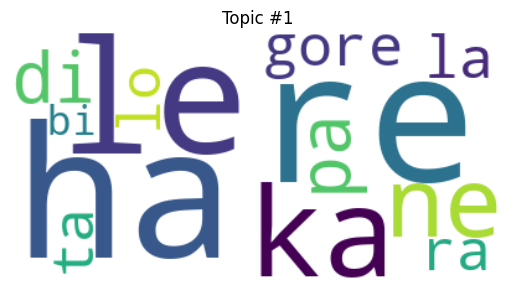

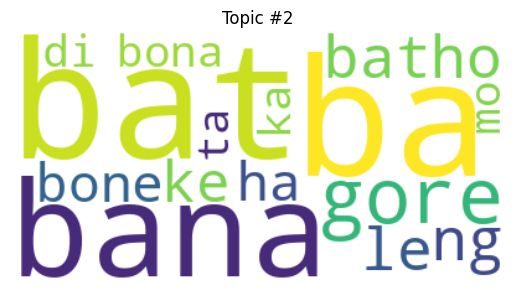

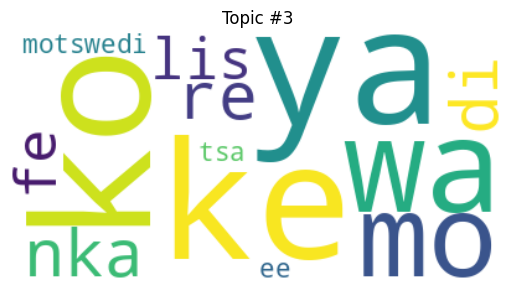

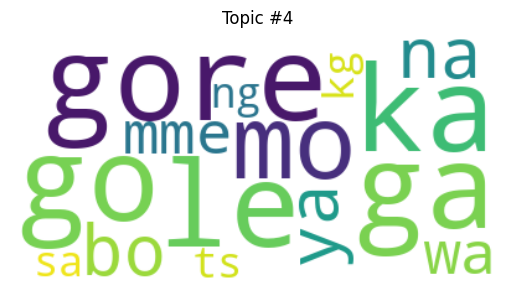


 NMFCoherence (c_v): 0.3719
 NMFCoherence (UMass): -0.5773
 NMFCoherence (NPMI): 0.0079
 NMFReconstruction Error: 27.5624


In [11]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

#  Load CSV
df = pd.read_csv('lemmatized_transcriptions_nostopwords.csv')

#  Clean text
def clean_text(text):
    if pd.isnull(text): return ''
    return text.lower().translate(str.maketrans('', '', string.punctuation))

df['cleaned_tswana'] = df['Split_Sentences'].apply(clean_text)

#  TF-IDF
tfidf = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf.fit_transform(df['cleaned_tswana'])
feature_names = tfidf.get_feature_names_out()

#  Train NMF
nmf = NMF(n_components=4, random_state=1)
nmf.fit(X)

#  Print topics
print("\n Top Words per Topic:")
def print_topics(model, feature_names, n_top_words=10):
    for i, topic in enumerate(model.components_):
        print(f"🔸 Topic {i+1}: {' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])}")

print_topics(nmf, feature_names)

#  WordClouds
for i, topic in enumerate(nmf.components_):
    wc = WordCloud(background_color='white').generate(' '.join([feature_names[j] for j in topic.argsort()[:-15 - 1:-1]]))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic #{i+1}")
    plt.show()


# Evaluation: Coherence and Reconstruction Error
tokens = df['cleaned_tswana'].apply(word_tokenize)
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(t) for t in tokens]

# Extract top topic words
topics = []
for topic in nmf.components_:
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics.append(top_words)

# Coherence Models
coherence_cv = CoherenceModel(
    topics=topics, texts=tokens, dictionary=dictionary, coherence='c_v'
)
coherence_umass = CoherenceModel(
    topics=topics, texts=tokens, dictionary=dictionary, coherence='u_mass'
)
coherence_npmi = CoherenceModel(
    topics=topics, texts=tokens, dictionary=dictionary, coherence='c_npmi'
)

# Get coherence scores
cv_score = coherence_cv.get_coherence()
umass_score = coherence_umass.get_coherence()
npmi_score = coherence_npmi.get_coherence()

# Print all results
print(f"\n NMFCoherence (c_v): {cv_score:.4f}")
print(f" NMFCoherence (UMass): {umass_score:.4f}")
print(f" NMFCoherence (NPMI): {npmi_score:.4f}")
print(f" NMFReconstruction Error: {nmf.reconstruction_err_:.4f}")

